In [74]:
from fastlane_bot import Bot#, Config, ConfigDB, ConfigNetwork, ConfigProvider
from fastlane_bot.tools.cpc import ConstantProductCurve as CPC, CPCContainer, T, Pair
from fastlane_bot.tools.analyzer import CPCAnalyzer
from fastlane_bot.tools.optimizer import SimpleOptimizer, MargPOptimizer, ConvexOptimizer
from fastlane_bot.tools.arbgraphs import ArbGraph
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(CPC))
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(CPCAnalyzer))
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(SimpleOptimizer))
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(MargPOptimizer))
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(ConvexOptimizer))
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(ArbGraph))
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(Bot))
from fastlane_bot.testing import *
import itertools as it
import collections as cl
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = [12,6]
from fastlane_bot import __VERSION__
require("3.0", __VERSION__)

ConstantProductCurve v2.11.2 (10/May/2023)
CPCAnalyzer v1.3 (11/May/2023)
SimpleOptimizer v4.0 (10/May/2023)
MargPOptimizer v4.0 (10/May/2023)
ConvexOptimizer v4.0 (10/May/2023)
ArbGraph v2.2 (09/May/2023)
CarbonBot v3-b2.1 (03/May/2023)
Version = 3-b2.1 [requirements >= 3.0 is met]


# Mainnet Statistics [A011]

In [75]:
bot     = Bot()
CCm     = bot.get_curves()
#CCm     = CPCContainer.from_df(pd.read_csv("A011.csv.gz"))
#CCm.asdf().to_csv("A011-test.csv.gz", compression = "gzip")
CCu3    = CCm.byparams(exchange="uniswap_v3")
CCu2    = CCm.byparams(exchange="uniswap_v2")
CCs2    = CCm.byparams(exchange="sushiswap_v2")
CCc1    = CCm.byparams(exchange="carbon_v1")
tc_u3   = CCu3.token_count(asdict=True)
tc_u2   = CCu2.token_count(asdict=True)
tc_s2   = CCs2.token_count(asdict=True)
tc_c1   = CCc1.token_count(asdict=True)
CAm     = CPCAnalyzer(CCm)


## Market structure analysis [NOTEST]

In [76]:
CA = CAm
pairs0  = CA.CC.pairs(standardize=False)
pairs   = CA.pairs()
pairsc  = CA.pairsc()
tokens  = CA.tokens()

In [77]:
print(f"Total pairs:    {len(pairs0):4}")
print(f"Primary pairs:  {len(pairs):4}")
print(f"...carbon:      {len(pairsc):4}")
print(f"Tokens:         {len(CA.tokens()):4}")
print(f"Curves:         {len(CCm):4}")

Total pairs:      44
Primary pairs:    28
...carbon:        26
Tokens:           23
Curves:           92


In [78]:
CA.count_by_pairs()

,count
pair,
WETH-6Cc2/USDC-eB48,17
BNT-FF1C/vBNT-7f94,10
BNT-FF1C/WETH-6Cc2,10
USDT-1ec7/USDC-eB48,5
stETH-fE84/WETH-6Cc2,3
DAI-1d0F/USDC-eB48,3
DAI-1d0F/USDT-1ec7,3
LINK-86CA/USDT-1ec7,3
CRV-cd52/USDC-eB48,3


In [79]:
CA.count_by_pairs(minn=2)

,count
pair,
WETH-6Cc2/USDC-eB48,17
BNT-FF1C/vBNT-7f94,10
BNT-FF1C/WETH-6Cc2,10
USDT-1ec7/USDC-eB48,5
stETH-fE84/WETH-6Cc2,3
DAI-1d0F/USDC-eB48,3
DAI-1d0F/USDT-1ec7,3
LINK-86CA/USDT-1ec7,3
CRV-cd52/USDC-eB48,3


### All crosses

In [80]:
CCx = CCm.bypairs(
    CCm.filter_pairs(notin=f"{T.ETH},{T.USDC},{T.USDT},{T.BNT},{T.DAI},{T.WBTC}")
)
len(CCx), CCx.token_count()[:10]

(3, [('MATIC-eBB0', 2), ('ARB-4ad1', 2), ('RPL-A51f', 1), ('XCHF-fc08', 1)])

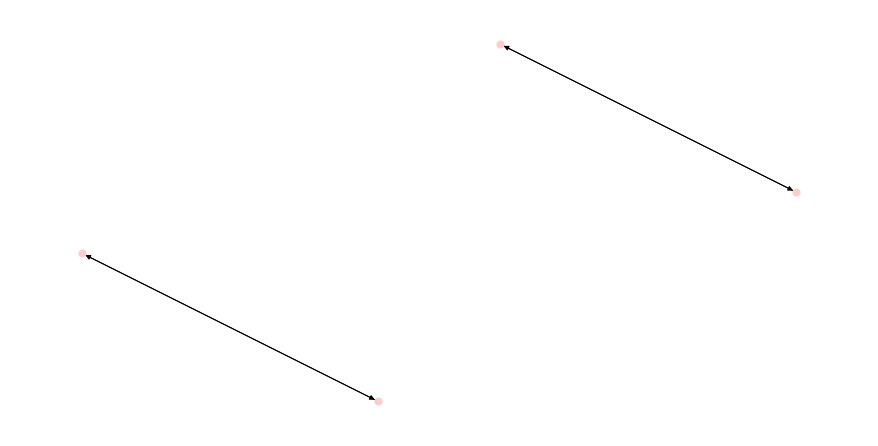

In [81]:
AGx=ArbGraph.from_cc(CCx)
AGx.plot(labels=False, node_size=50, node_color="#fcc")._

### Biggest crosses (HEX, UNI, ICHI, FRAX)

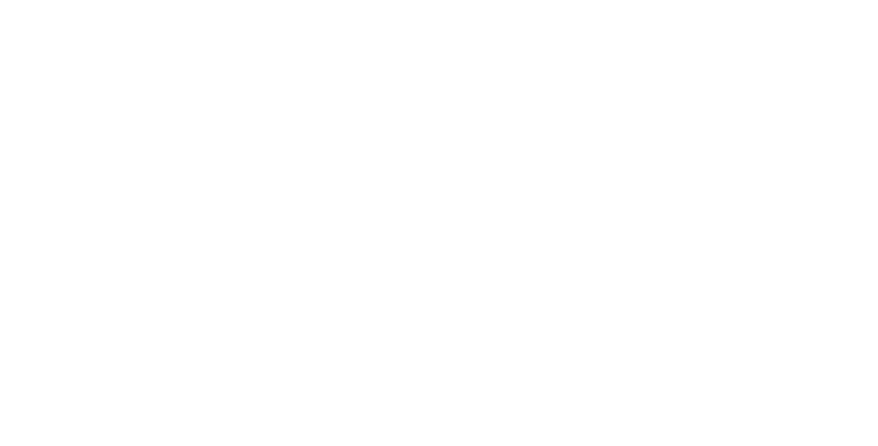

0

In [82]:
CCx2 = CCx.bypairs(
    CCx.filter_pairs(onein=f"{T.HEX}, {T.UNI}, {T.ICHI}, {T.FRAX}")
)
ArbGraph.from_cc(CCx2).plot()
len(CCx2)

### Carbon

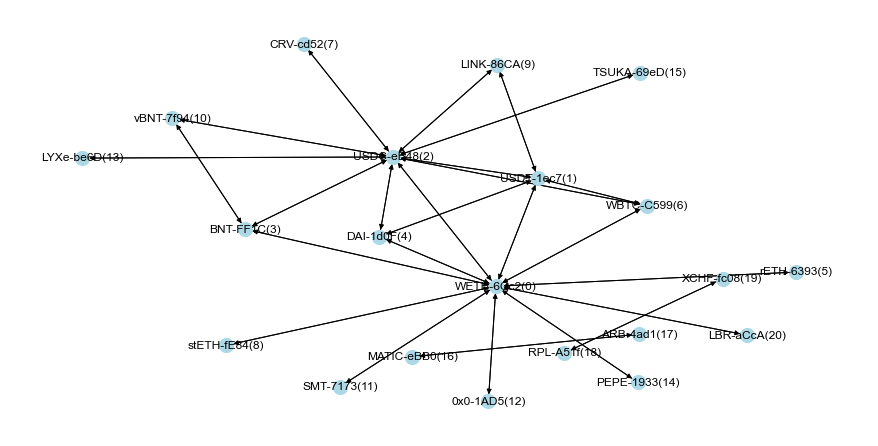

In [83]:
ArbGraph.from_cc(CCc1).plot()._

In [84]:
len(CCc1), len(CCc1.tokens())

(70, 21)

In [85]:
CCc1.token_count()

[('WETH-6Cc2', 38),
 ('USDC-eB48', 31),
 ('BNT-FF1C', 20),
 ('USDT-1ec7', 10),
 ('vBNT-7f94', 10),
 ('DAI-1d0F', 5),
 ('WBTC-C599', 4),
 ('LINK-86CA', 3),
 ('CRV-cd52', 2),
 ('stETH-fE84', 2),
 ('0x0-1AD5', 2),
 ('PEPE-1933', 2),
 ('MATIC-eBB0', 2),
 ('ARB-4ad1', 2),
 ('rETH-6393', 1),
 ('SMT-7173', 1),
 ('LYXe-be6D', 1),
 ('TSUKA-69eD', 1),
 ('RPL-A51f', 1),
 ('XCHF-fc08', 1),
 ('LBR-aCcA', 1)]

In [86]:
len(CCc1.pairs()), CCc1.pairs()

(26,
 {'0x0-1AD5/WETH-6Cc2',
  'ARB-4ad1/MATIC-eBB0',
  'BNT-FF1C/USDC-eB48',
  'BNT-FF1C/WETH-6Cc2',
  'BNT-FF1C/vBNT-7f94',
  'CRV-cd52/USDC-eB48',
  'DAI-1d0F/USDC-eB48',
  'DAI-1d0F/USDT-1ec7',
  'LBR-aCcA/WETH-6Cc2',
  'LINK-86CA/USDC-eB48',
  'LINK-86CA/USDT-1ec7',
  'LYXe-be6D/USDC-eB48',
  'PEPE-1933/WETH-6Cc2',
  'RPL-A51f/XCHF-fc08',
  'SMT-7173/WETH-6Cc2',
  'TSUKA-69eD/USDC-eB48',
  'USDT-1ec7/USDC-eB48',
  'WBTC-C599/USDC-eB48',
  'WBTC-C599/USDT-1ec7',
  'WBTC-C599/WETH-6Cc2',
  'WETH-6Cc2/DAI-1d0F',
  'WETH-6Cc2/USDC-eB48',
  'WETH-6Cc2/USDT-1ec7',
  'rETH-6393/WETH-6Cc2',
  'stETH-fE84/WETH-6Cc2',
  'vBNT-7f94/USDC-eB48'})

### Token subsets

In [87]:
O = MargPOptimizer(CCm.bypairs(
    CCm.filter_pairs(bothin=f"{T.ETH},{T.USDC},{T.USDT},{T.BNT},{T.DAI},{T.WBTC}")
))
r = O.margp_optimizer(f"{T.USDC}", params=dict(verbose=False, debug=False))
r.trade_instructions(ti_format=O.TIF_DFAGGR)

In [88]:
#r.trade_instructions(ti_format=O.TIF_DFAGGR).fillna("").to_excel("ti.xlsx")

In [89]:
#ArbGraph.from_r(r).plot()._

In [90]:
#O.CC.plot()

## All pairs

In [91]:
for pair in CAm.pairsc():
    pi = CA.pair_data(pair)
    O = MargPOptimizer(pi.CC)
    tkn0, tkn1 = pair.split("/")
    
    try:
        r0 = O.margp_optimizer(tkn0, params=dict(verbose=False, debug=False))
        r0.trade_instructions(ti_format=O.TIF_DFAGGR)
        r00 = r0.result or 0

        r1 = O.margp_optimizer(targettkn, params=dict(verbose=False, debug=False))
        r11 = r1.result or 0
        r1.trade_instructions(ti_format=O.TIF_DFAGGR)

        print(f"{Pair.n(pair):12}- {-r00:12.4f} {tkn0:10} {-r11:12.4f} {tkn1:10}")
    except Exception as e:
        print(f"{Pair.n(pair):12}-")

WBTC/USDT   -       0.0000 WBTC-C599        0.0000 USDT-1ec7 
DAI/USDC    -       0.0000 DAI-1d0F         0.0000 USDC-eB48 
LBR/WETH    -       0.0000 LBR-aCcA         0.0000 WETH-6Cc2 
WETH/USDC   -       0.0027 WETH-6Cc2        0.0000 USDC-eB48 
vBNT/USDC   -       0.0000 vBNT-7f94        0.0000 USDC-eB48 
CRV/USDC    -       0.1321 CRV-cd52         0.0000 USDC-eB48 
WBTC/WETH   -       0.0000 WBTC-C599        0.0000 WETH-6Cc2 
rETH/WETH   -       0.0026 rETH-6393        0.0000 WETH-6Cc2 
WETH/DAI    -      -0.0000 WETH-6Cc2        0.0000 DAI-1d0F  
BNT/vBNT    -       0.0354 BNT-FF1C         0.0000 vBNT-7f94 
WETH/USDT   -       0.0001 WETH-6Cc2        0.0000 USDT-1ec7 
LINK/USDT   -       0.0033 LINK-86CA        0.0000 USDT-1ec7 
LINK/USDC   -       0.0000 LINK-86CA        0.0000 USDC-eB48 
ARB/MATIC   -
USDT/USDC   -       0.4763 USDT-1ec7        0.0000 USDC-eB48 
WBTC/USDC   -       0.0003 WBTC-C599        0.0000 USDC-eB48 
TSUKA/USDC  -       0.0000 TSUKA-69eD       0.0000 USDC-

## Analysis by pair

In [92]:
pricedf = CAm.pool_arbitrage_statistics()
pricedf

price            vl itm  bs  \
pair       exchange   cid0                                       
0x0/WETH   carbon_v1  132277-0  0.000013  1.342084e+04       b   
                      132277-1  0.000015  3.597323e+02       s   
ARB/MATIC  carbon_v1  806240-0  1.507045  1.276054e+01       s   
                      806240-1  1.428571  1.418060e+02       b   
BNT/USDC   bancor_v3  720       0.424194  5.321981e+06      bs   
...                                  ...           ...  ..  ..   
rETH/WETH  uniswap_v3 82c4849c  1.070497  1.851524e+02      bs   
stETH/WETH carbon_v1  422914-0  1.010101  2.031521e-03       s   
                      422914-1  0.990099  8.011450e-02       b   
           uniswap_v2 ff7abe20  0.999381  2.400440e+03      bs   
vBNT/USDC  carbon_v1  171896-1  0.390000  5.000000e+03       s   

                                                                 bsv  
pair       exchange   cid0                                            
0x0/WETH   carbon_v1  132277-0           buy-0x0 @ 0.00 WETH per 0x0  
                      132277-1          sell-0x0 @ 0.00 WETH per 0x0  
ARB/MATIC  carbon_v1  806240-0         sell-ARB @ 1.51 MATIC per ARB  
                      806240-1          buy-ARB @ 1.43 MATIC per ARB  
BNT/USDC   bancor_v3  720           buy-sell-BNT @ 0.42 USDC per BNT  
...                                                              ...  
rETH/WETH  uniswap_v3 82c4849c    buy-sell-rETH @ 1.07 WETH per rETH  
stETH/WETH carbon_v1  422914-0      sell-stETH @ 1.01 WETH per stETH  
                      422914-1       buy-stETH @ 0.99 WETH per stETH  
           uniswap_v2 ff7abe20  buy-sell-stETH @ 1.00 WETH per stETH  
vBNT/USDC  carbon_v1  171896-1        sell-vBNT @ 0.39 USDC per vBNT  

[90 rows x 5 columns]

### WETH/USDC

In [93]:
pair = "WETH-6Cc2/USDC-eB48"
print(f"Pair = {pair}")

Pair = WETH-6Cc2/USDC-eB48


In [94]:
df = pricedf.loc[Pair.n(pair)]
df

price          vl itm  bs  \
exchange   cid0                                        
carbon_v1  057285-1  2099.999790    0.006040       s   
           057292-0  1853.408818    0.003314   x   b   
           057292-1  2000.000000    0.016387       s   
           057296-0  1929.999807    0.001033   x   b   
           057296-1  1949.999805   10.460391       s   
           057299-1  1940.000000    0.026117       s   
           057306-0  1405.000140    3.558719       b   
           057315-1  2300.000000    0.487950       s   
           057331-0  1800.000000    5.555556       b   
           057334-0  1700.000170    0.029412       b   
           057334-1  1999.999800    0.040000       s   
           057337-0  1850.000000    1.081081   x   b   
           057339-0  1800.000000    0.000556       b   
           057343-1  1989.999801    1.000000       s   
           057353-0  1853.999815    0.004235   x   b   
           057353-1  2047.999795    8.230465       s   
uniswap_v3 76b13aa0  1804.497558  429.172393   x  bs   

                                                       bsv  
exchange   cid0                                             
carbon_v1  057285-1      sell-WETH @ 2100.00 USDC per WETH  
           057292-0       buy-WETH @ 1853.41 USDC per WETH  
           057292-1      sell-WETH @ 2000.00 USDC per WETH  
           057296-0       buy-WETH @ 1930.00 USDC per WETH  
           057296-1      sell-WETH @ 1950.00 USDC per WETH  
           057299-1      sell-WETH @ 1940.00 USDC per WETH  
           057306-0       buy-WETH @ 1405.00 USDC per WETH  
           057315-1      sell-WETH @ 2300.00 USDC per WETH  
           057331-0       buy-WETH @ 1800.00 USDC per WETH  
           057334-0       buy-WETH @ 1700.00 USDC per WETH  
           057334-1      sell-WETH @ 2000.00 USDC per WETH  
           057337-0       buy-WETH @ 1850.00 USDC per WETH  
           057339-0       buy-WETH @ 1800.00 USDC per WETH  
           057343-1      sell-WETH @ 1990.00 USDC per WETH  
           057353-0       buy-WETH @ 1854.00 USDC per WETH  
           057353-1      sell-WETH @ 2048.00 USDC per WETH  
uniswap_v3 76b13aa0  buy-sell-WETH @ 1804.50 USDC per WETH

In [95]:
pi = CA.pair_data(pair)
O = MargPOptimizer(pi.CC)

#### Target token = base token

In [96]:
targettkn = pair.split("/")[0]
print(f"Target token = {targettkn}")
r = O.margp_optimizer(targettkn, params=dict(verbose=False, debug=False))
r.trade_instructions(ti_format=O.TIF_DFAGGR)

Target token = WETH-6Cc2


,USDC-eB48,WETH-6Cc2
7ed16708962e459abe5431a176b13aa0,3.694090e+02,-0.204715
1701411834604692317316873037158841057292-0,-6.141325e+00,0.003317
1701411834604692317316873037158841057296-0,-1.994537e+00,0.001033
1701411834604692317316873037158841057337-0,-3.534220e+02,0.193432
1701411834604692317316873037158841057353-0,-7.851120e+00,0.004235
PRICE,5.541693e-04,1.000000
AMMIn,3.694090e+02,0.202017
AMMOut,-3.694090e+02,-0.204715
TOTAL NET,-1.955877e-07,-0.002698


In [97]:
dfti1 = r.trade_instructions(ti_format=O.TIF_DFPG8)
print(f"Total gain: {sum(dfti1['gain_ttkn']):.4f} {targettkn}")
dfti1

Total gain: 0.0027 WETH-6Cc2


fee       pair    amt_tknq       tknq       margp0  \
exch       cid                                                                
uniswap_v3 a176b13aa0  0.003  USDC/WETH   -0.204715  WETH-6Cc2     0.000554   
carbon_v1  41057337-0  0.002  WETH/USDC -353.422042  USDC-eB48  1850.000000   
           41057353-0  0.002  WETH/USDC   -7.851120  USDC-eB48  1853.999815   
           41057292-0  0.002  WETH/USDC   -6.141325  USDC-eB48  1853.408818   
           41057296-0  0.002  WETH/USDC   -1.994537  USDC-eB48  1929.999807   

                              effp        margp    gain_r     gain_tknq  \
exch       cid                                                            
uniswap_v3 a176b13aa0     0.000554     0.000554  0.000001  2.926785e-07   
carbon_v1  41057337-0  1827.109747  1804.502718  0.012528  4.427714e+00   
           41057353-0  1853.999391  1804.502718  0.027430  2.153526e-01   
           41057292-0  1851.703624  1804.502718  0.026157  1.606404e-01   
           41057296-0  1929.997779  1804.502718  0.069546  1.387111e-01   

                          gain_ttkn  
exch       cid                       
uniswap_v3 a176b13aa0  2.926785e-07  
carbon_v1  41057337-0  2.453703e-03  
           41057353-0  1.193418e-04  
           41057292-0  8.902200e-05  
           41057296-0  7.686944e-05

#### Target token = quote token

In [98]:
targettkn = pair.split("/")[1]
print(f"Target token = {targettkn}")
r = O.margp_optimizer(targettkn, params=dict(verbose=False, debug=False))
r.trade_instructions(ti_format=O.TIF_DFAGGR)

Target token = USDC-eB48


,USDC-eB48,WETH-6Cc2
7ed16708962e459abe5431a176b13aa0,364.540257,-2.020173e-01
1701411834604692317316873037158841057292-0,-6.141325,3.316581e-03
1701411834604692317316873037158841057296-0,-1.994537,1.033440e-03
1701411834604692317316873037158841057337-0,-353.422573,1.934326e-01
1701411834604692317316873037158841057353-0,-7.851120,4.234694e-03
PRICE,1.000000,1.804503e+03
AMMIn,364.540257,2.020173e-01
AMMOut,-369.409556,-2.020173e-01
TOTAL NET,-4.869298,9.587264e-11


In [99]:
dfti2 = r.trade_instructions(ti_format=O.TIF_DFPG8)
print(f"Total gain: {sum(dfti2['gain_ttkn']):.4f}", targettkn)
dfti2

Total gain: 4.9429 USDC-eB48


fee       pair    amt_tknq       tknq       margp0  \
exch       cid                                                                
uniswap_v3 a176b13aa0  0.003  USDC/WETH   -0.202017  WETH-6Cc2     0.000554   
carbon_v1  41057337-0  0.002  WETH/USDC -353.422573  USDC-eB48  1850.000000   
           41057353-0  0.002  WETH/USDC   -7.851120  USDC-eB48  1853.999815   
           41057292-0  0.002  WETH/USDC   -6.141325  USDC-eB48  1853.408818   
           41057296-0  0.002  WETH/USDC   -1.994537  USDC-eB48  1929.999807   

                              effp        margp    gain_r     gain_tknq  \
exch       cid                                                            
uniswap_v3 a176b13aa0     0.000554     0.000554  0.000001  2.850311e-07   
carbon_v1  41057337-0  1827.109713  1804.502650  0.012528  4.427728e+00   
           41057353-0  1853.999391  1804.502650  0.027430  2.153529e-01   
           41057292-0  1851.703624  1804.502650  0.026157  1.606407e-01   
           41057296-0  1929.997779  1804.502650  0.069546  1.387112e-01   

                       gain_ttkn  
exch       cid                    
uniswap_v3 a176b13aa0   0.000514  
carbon_v1  41057337-0   4.427728  
           41057353-0   0.215353  
           41057292-0   0.160641  
           41057296-0   0.138711